# Pandas

pandas is an open source, BSD-licensed library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language. https://pandas.pydata.org/


## What problem does pandas solve?

Python has long been great for data munging and preparation, but less so for data analysis and modeling. pandas helps fill this gap, enabling you to carry out your entire data analysis workflow in Python without having to switch to a more domain specific language like R.

Combined with the excellent IPython toolkit and other libraries, the environment for doing data analysis in Python excels in performance, productivity, and the ability to collaborate.

pandas does not implement significant modeling functionality outside of linear and panel regression; for this, look to statsmodels and scikit-learn. More work is still needed to make Python a first class statistical modeling environment, but we are well on our way toward that goal.

## Library Highlights

- A fast and efficient DataFrame object for data manipulation with integrated indexing;
- Tools for reading and writing data between in-memory data structures and different formats: CSV and text files, Microsoft Excel, SQL databases, and the fast HDF5 format;
- Intelligent data alignment and integrated handling of missing data: gain automatic label-based alignment in computations and easily manipulate messy data into an orderly form;
- Flexible reshaping and pivoting of data sets;
- Intelligent label-based slicing, fancy indexing, and subsetting of large data sets;
- Columns can be inserted and deleted from data structures for size mutability;
- Aggregating or transforming data with a powerful group by engine allowing split-apply-combine operations on data sets;
- High performance merging and joining of data sets;
- Hierarchical axis indexing provides an intuitive way of working with high-dimensional data in a lower-dimensional data structure;
- Time series-functionality: date range generation and frequency conversion, moving window statistics, moving window linear regressions, date shifting and lagging. Even create domain-specific time offsets and join time series without losing data;
- Highly optimized for performance, with critical code paths written in Cython or C.
- Python with pandas is in use in a wide variety of academic and commercial domains, including Finance, Neuroscience, Economics, Statistics, Advertising, Web Analytics, and more.

General Pandas Cheat Sheet: 
https://assets.datacamp.com/blog_assets/PandasPythonForDataScience.pdf

In [1]:
import pandas as pd, numpy as np

# Pandas Data Structures
In this section we will see the DataFrame and Series structure 

In [2]:
fruits = pd.DataFrame({'Apples':[30],'Bananas':[21]})
fruits

,Apples,Bananas
0,30,21


In [3]:
pd.DataFrame({'Apples':[35,41],'Bananas':[21,34]},index=['2017 Sales','2018 Sales'])

,Apples,Bananas
2017 Sales,35,21
2018 Sales,41,34


In [4]:
pd.Series(['4 cups','1 cup','2 large','1 can'],index=['Flour','Milk','Eggs','Spam'],name='Dinner')

Flour     4 cups
Milk       1 cup
Eggs     2 large
Spam       1 can
Name: Dinner, dtype: object

In [5]:
data = np.array([['','Col1','Col2'],
                ['Row1',1,2],
                ['Row2',3,4],
                ['Row3',5,6]])
                
df = pd.DataFrame(data=data[1:,1:],
                  index=data[1:,0],
                  columns=data[0,1:])

df

,Col1,Col2
Row1,1,2
Row2,3,4
Row3,5,6


### Read and Write

One of the most common file formats for datasets is the csv, pandas has specific functions for the classic formats csv, json, excel ...

In [6]:
df.to_csv("df.csv")

In [7]:
df_r = pd.read_csv("df.csv",index_col=0)

In [8]:
df_r

,Col1,Col2
Row1,1,2
Row2,3,4
Row3,5,6


### DataFrame properties

In [9]:
df.shape

(3, 2)

In [10]:
df.index, df.columns

(Index(['Row1', 'Row2', 'Row3'], dtype='object'),
 Index(['Col1', 'Col2'], dtype='object'))

In [11]:
len(df.index), len(df.columns)

(3, 2)

In [12]:
df.count()

Col1    3
Col2    3
dtype: int64

In [13]:
df.T

,Row1,Row2,Row3
Col1,1,3,5
Col2,2,4,6


In [14]:
df.values

array([['1', '2'],
       ['3', '4'],
       ['5', '6']], dtype=object)

In [15]:
df.values.astype(int)

array([[1, 2],
       [3, 4],
       [5, 6]])

In [16]:
df.T

,Row1,Row2,Row3
Col1,1,3,5
Col2,2,4,6


### Select an Index or Column From a Pandas DataFrame

In [17]:
df.iloc[0][0]

'1'

In [18]:
df.loc['Row1']['Col1']

'1'

In [19]:
df.at['Row1','Col1']

'1'

In [20]:
df.iat[0,0]

'1'

In [21]:
df.iloc[:,0]

Row1    1
Row2    3
Row3    5
Name: Col1, dtype: object

In [22]:
df.iloc[0][0]

'1'

In [23]:
df.loc[:,'Col1']

Row1    1
Row2    3
Row3    5
Name: Col1, dtype: object

In [24]:
df.loc['Row1',:]

Col1    1
Col2    2
Name: Row1, dtype: object

### Add and Delete Rows and Columns

In [25]:
df

,Col1,Col2
Row1,1,2
Row2,3,4
Row3,5,6


In [26]:
df.loc["Row4"] = [7,8]
df

,Col1,Col2
Row1,1,2
Row2,3,4
Row3,5,6
Row4,7,8


In [27]:
df["Col3"] = [9,10,11,12]
df

,Col1,Col2,Col3
Row1,1,2,9
Row2,3,4,10
Row3,5,6,11
Row4,7,8,12


In [28]:
df.drop("Row4",inplace=True)
df

,Col1,Col2,Col3
Row1,1,2,9
Row2,3,4,10
Row3,5,6,11


In [29]:
df.drop("Col3",axis=1,inplace=True)
df

,Col1,Col2
Row1,1,2
Row2,3,4
Row3,5,6


# Practical case

To do data analysis, sometimes we will need more complex data structures than a numpy array. **Tabular data and DataFrames**

Lets do a naive web scraping to get some data...
Hint: Maintain `Shift` and hit `Tab` twice inside `pd.read_html()` parenthesis.

In [30]:
tables_url = "https://es.wikipedia.org/wiki/Anexo:Centrales_t%C3%A9rmicas_en_Espa%C3%B1a"
ldfs = pd.read_html(tables_url,encoding='utf-8')[1:]
ldfs[0]

,Imagen,Nombre,Municipio,Provincia,Tipo,Grupos,Potencia,Propietario,Localización
0,NaN,Central térmica Litoral de Almería,Carboneras,Almería,convencional,2,1159 MW,Endesa[6]​[7]​,"36°58′40″N 1°54′16″O﻿ / ﻿36.97778, -1.90444"
1,NaN,Central térmica de Arcos,Arcos de la Frontera,Cádiz,c. combinado,3,1613 MW,Iberdrola[8]​[6]​[9]​,"36°40′21″N 5°48′58″O﻿ / ﻿36.67250, -5.81611"
2,NaN,Central térmica Bahía de Algeciras,San Roque,Cádiz,c. combinado,2,800 MW,Repsol[6]​[10]​,"36°10′58″N 5°23′22″O﻿ / ﻿36.18278, -5.38944"
3,NaN,Central térmica Campo de Gibraltar,San Roque,Cádiz,c. combinado,2,789 MW,Naturgy / CEPSA[11]​[6]​,"36°11′00″N 5°23′35″O﻿ / ﻿36.18333, -5.39306"
4,NaN,Central de ciclo combinado de San Roque,San Roque,Cádiz,c. combinado,2,800 MW,Endesa / Naturgy[6]​[7]​[12]​,"36°11′44″N 5°24′47″O﻿ / ﻿36.19556, -5.41306"
5,NaN,Central térmica de Los Barrios,Los Barrios,Cádiz,convencional,1,567 MW,Viesgo[13]​[6]​[14]​,"36°10′58″N 5°25′12″O﻿ / ﻿36.18278, -5.42000"
6,NaN,Central térmica de Puente Nuevo,Espiel,Córdoba,convencional,1,324 MW,Viesgo[6]​[14]​,"38°06′38″N 4°56′05″O﻿ / ﻿38.11056, -4.93472"
7,NaN,Central térmica Cristóbal Colón,Huelva,Huelva,c. combinado,1,400 MW,Endesa[7]​[6]​,"37°12′57″N 6°56′39″O﻿ / ﻿37.21583, -6.94417"
8,NaN,Central térmica de Palos de la Frontera,Palos de la Frontera,Huelva,c. combinado,3,1200 MW,Naturgy[15]​[6]​,"37°11′03″N 6°53′09″O﻿ / ﻿37.18417, -6.88583"
9,NaN,Central térmica de Campanillas,Málaga,Málaga,c. combinado,1,400 MW,Naturgy[16]​[6]​,"36°44′54″N 4°33′46″O﻿ / ﻿36.74833, -4.56278"


In [31]:
pd.DataFrame([list(df) for df in ldfs])

,0,1,2,3,4,5,6,7,8
0,Imagen,Nombre,Municipio,Provincia,Tipo,Grupos,Potencia,Propietario,Localización
1,Imagen,Nombre,Municipio,Provincia,Tipo,Grupos,Potencia,Propietario,Localización
2,Imagen,Nombre,Concejo,Provincia,Tipo,Grupos,Potencia,Propietario,Localización
3,Imagen,Nombre,Municipio/isla,Provincia,Tipo,Grupos,Potencia,Propietario,Localización
4,Imagen,Nombre,Municipio/isla,Provincia,Tipo,Grupos,Potencia,Propietario,Localización
5,Imagen,Nombre,Municipio,Provincia,Tipo,Grupos,Potencia,Propietario,Localización
6,Imagen,Nombre,Municipio,Provincia,Tipo,Grupos,Potencia,Propietario,Localización
7,Imagen,Nombre,Municipio,Provincia,Tipo,Grupos,Potencia,Propietario,Localización
8,Imagen,Nombre,Municipio,Provincia,Tipo,Grupos,Potencia,Propietario,Localización
9,Imagen,Nombre,Municipio,Provincia,Tipo,Grupos,Potencia,Propietario,Localización


In [32]:
ldfs[2].rename(index=str, columns={"Concejo": "Municipio"},inplace=True)

In [33]:
[df.rename(index=str, columns={"Municipio/isla": "Municipio"},inplace=True) for df in ldfs[2:5]];

In [34]:
pd.DataFrame([list(df) for df in ldfs])

,0,1,2,3,4,5,6,7,8
0,Imagen,Nombre,Municipio,Provincia,Tipo,Grupos,Potencia,Propietario,Localización
1,Imagen,Nombre,Municipio,Provincia,Tipo,Grupos,Potencia,Propietario,Localización
2,Imagen,Nombre,Municipio,Provincia,Tipo,Grupos,Potencia,Propietario,Localización
3,Imagen,Nombre,Municipio,Provincia,Tipo,Grupos,Potencia,Propietario,Localización
4,Imagen,Nombre,Municipio,Provincia,Tipo,Grupos,Potencia,Propietario,Localización
5,Imagen,Nombre,Municipio,Provincia,Tipo,Grupos,Potencia,Propietario,Localización
6,Imagen,Nombre,Municipio,Provincia,Tipo,Grupos,Potencia,Propietario,Localización
7,Imagen,Nombre,Municipio,Provincia,Tipo,Grupos,Potencia,Propietario,Localización
8,Imagen,Nombre,Municipio,Provincia,Tipo,Grupos,Potencia,Propietario,Localización
9,Imagen,Nombre,Municipio,Provincia,Tipo,Grupos,Potencia,Propietario,Localización


In [35]:
df = pd.concat(ldfs)
df.head()

,Imagen,Nombre,Municipio,Provincia,Tipo,Grupos,Potencia,Propietario,Localización
0,NaN,Central térmica Litoral de Almería,Carboneras,Almería,convencional,2,1159 MW,Endesa[6]​[7]​,"36°58′40″N 1°54′16″O﻿ / ﻿36.97778, -1.90444"
1,NaN,Central térmica de Arcos,Arcos de la Frontera,Cádiz,c. combinado,3,1613 MW,Iberdrola[8]​[6]​[9]​,"36°40′21″N 5°48′58″O﻿ / ﻿36.67250, -5.81611"
2,NaN,Central térmica Bahía de Algeciras,San Roque,Cádiz,c. combinado,2,800 MW,Repsol[6]​[10]​,"36°10′58″N 5°23′22″O﻿ / ﻿36.18278, -5.38944"
3,NaN,Central térmica Campo de Gibraltar,San Roque,Cádiz,c. combinado,2,789 MW,Naturgy / CEPSA[11]​[6]​,"36°11′00″N 5°23′35″O﻿ / ﻿36.18333, -5.39306"
4,NaN,Central de ciclo combinado de San Roque,San Roque,Cádiz,c. combinado,2,800 MW,Endesa / Naturgy[6]​[7]​[12]​,"36°11′44″N 5°24′47″O﻿ / ﻿36.19556, -5.41306"


In [36]:
df.reset_index(drop=True,inplace=True)

In [37]:
df.rename(index=str, columns={
    "Imagen": "Image",
    "Nombre": "Name",
    "Municipio": "Township",
    "Provincia": "Province",
    "Tipo":"Type",
    "Grupos":"Groups",
    "Potencia":"Power",
    "Propietario":"Owners",
    "Localización":"Loc"
},inplace=True) 

Remove Image column, as we have no images there.

In [38]:
del df["Image"]
df.head()

,Name,Township,Province,Type,Groups,Power,Owners,Loc
0,Central térmica Litoral de Almería,Carboneras,Almería,convencional,2,1159 MW,Endesa[6]​[7]​,"36°58′40″N 1°54′16″O﻿ / ﻿36.97778, -1.90444"
1,Central térmica de Arcos,Arcos de la Frontera,Cádiz,c. combinado,3,1613 MW,Iberdrola[8]​[6]​[9]​,"36°40′21″N 5°48′58″O﻿ / ﻿36.67250, -5.81611"
2,Central térmica Bahía de Algeciras,San Roque,Cádiz,c. combinado,2,800 MW,Repsol[6]​[10]​,"36°10′58″N 5°23′22″O﻿ / ﻿36.18278, -5.38944"
3,Central térmica Campo de Gibraltar,San Roque,Cádiz,c. combinado,2,789 MW,Naturgy / CEPSA[11]​[6]​,"36°11′00″N 5°23′35″O﻿ / ﻿36.18333, -5.39306"
4,Central de ciclo combinado de San Roque,San Roque,Cádiz,c. combinado,2,800 MW,Endesa / Naturgy[6]​[7]​[12]​,"36°11′44″N 5°24′47″O﻿ / ﻿36.19556, -5.41306"


Remove the MW in column Power and change the strings to floats, as Power should be a continuous variable.

In [39]:
df[["Power"]].T

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
Power,1159 MW,1613 MW,800 MW,789 MW,800 MW,567 MW,324 MW,400 MW,1200 MW,400 MW,...,831 MW,1200 MW,842 MW,386 MW,795 MW,755 MW,402 MW,800 MW,1650 MW,1200 MW


In [40]:
df["Power"].apply(lambda x: float(x.split(" ")[0]))

ValueError: could not convert string to float: '212MW'

In [41]:
df["Power"][df["Power"] == '212MW'] = "212 MW"

In [42]:
df["Power in MW"] = df["Power"].apply(lambda x: float(x.split(" ")[0].replace(",",".")))

In [43]:
del df["Power"]

In [44]:
df.head()

,Name,Township,Province,Type,Groups,Owners,Loc,Power in MW
0,Central térmica Litoral de Almería,Carboneras,Almería,convencional,2,Endesa[6]​[7]​,"36°58′40″N 1°54′16″O﻿ / ﻿36.97778, -1.90444",1159.0
1,Central térmica de Arcos,Arcos de la Frontera,Cádiz,c. combinado,3,Iberdrola[8]​[6]​[9]​,"36°40′21″N 5°48′58″O﻿ / ﻿36.67250, -5.81611",1613.0
2,Central térmica Bahía de Algeciras,San Roque,Cádiz,c. combinado,2,Repsol[6]​[10]​,"36°10′58″N 5°23′22″O﻿ / ﻿36.18278, -5.38944",800.0
3,Central térmica Campo de Gibraltar,San Roque,Cádiz,c. combinado,2,Naturgy / CEPSA[11]​[6]​,"36°11′00″N 5°23′35″O﻿ / ﻿36.18333, -5.39306",789.0
4,Central de ciclo combinado de San Roque,San Roque,Cádiz,c. combinado,2,Endesa / Naturgy[6]​[7]​[12]​,"36°11′44″N 5°24′47″O﻿ / ﻿36.19556, -5.41306",800.0


Change variable Groups to ints

In [45]:
df[["Groups"]].T

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
Groups,2,3,2,2,2,1,1,1,3,1,...,2,3,2,1,2,2,1,2,2,3


In [46]:
df.Groups.unique()

array([2, 3, 1, '2', '1', '3', '4 (2C+2CC)', 6, 5, '7(4C+3CC)', '13',
       '11', '10', '9(6C+3CC)', '8', 4, '4(2C+2CC)', 10, '5(4C+1CC)'],
      dtype=object)

In [47]:
df["Groups"] = df["Groups"].apply(lambda x: int(str(x).split("(")[0]))

Now remove the references in the Owners column

In [48]:
df[["Owners"]].T

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
Owners,Endesa[6]​[7]​,Iberdrola[8]​[6]​[9]​,Repsol[6]​[10]​,Naturgy / CEPSA[11]​[6]​,Endesa / Naturgy[6]​[7]​[12]​,Viesgo[13]​[6]​[14]​,Viesgo[6]​[14]​,Endesa[7]​[6]​,Naturgy[15]​[6]​,Naturgy[16]​[6]​,...,Iberdrola[9]​,Naturgy[41]​,HC Energía[42]​,Iberdrola[9]​,EVE / BP[9]​,ESB Co. / Osaka Gas[43]​[44]​,Iberdrola[9]​,ContourGlobal[45]​,Iberdrola[9]​,Naturgy[46]​[47]​


In [49]:
df.Owners.unique().tolist()

['Endesa[6]\u200b[7]\u200b',
 'Iberdrola[8]\u200b[6]\u200b[9]\u200b',
 'Repsol[6]\u200b[10]\u200b',
 'Naturgy / CEPSA[11]\u200b[6]\u200b',
 'Endesa / Naturgy[6]\u200b[7]\u200b[12]\u200b',
 'Viesgo[13]\u200b[6]\u200b[14]\u200b',
 'Viesgo[6]\u200b[14]\u200b',
 'Endesa[7]\u200b[6]\u200b',
 'Naturgy[15]\u200b[6]\u200b',
 'Naturgy[16]\u200b[6]\u200b',
 'Endesa[7]\u200b',
 'Engie[17]\u200b[18]\u200b',
 'Repsol[19]\u200b[10]\u200b',
 'Global 3 Energía[19]\u200b',
 'HC Energía[20]\u200b',
 'Iberdrola[21]\u200b',
 'Hunosa[22]\u200b',
 'Naturgy[23]\u200b',
 'HC Energía[24]\u200b',
 'Endesa[25]\u200b[7]\u200b',
 'Endesa[26]\u200b[7]\u200b',
 'Endesa[27]\u200b[7]\u200b',
 'Endesa[28]\u200b[7]\u200b',
 'CEPSA[29]\u200b[11]\u200b',
 'Naturgy[30]\u200b',
 'Iberdrola[21]\u200b[31]\u200b',
 'Iberdrola / Naturgy[9]\u200b',
 'Naturgy[32]\u200b',
 'Endesa[7]\u200b[33]\u200b',
 'Naturgy / Endesa[34]\u200b[7]\u200b',
 'Viesgo[13]\u200b[10]\u200b',
 'Iberdrola[9]\u200b',
 'Alpiq[35]\u200b',
 'Endesa[7]\u200b

In [50]:
df["Owners"] = df["Owners"].apply(lambda x: x.split("[")[0])

In [51]:
df.Owners.unique().tolist()

['Endesa',
 'Iberdrola',
 'Repsol',
 'Naturgy / CEPSA',
 'Endesa / Naturgy',
 'Viesgo',
 'Naturgy',
 'Engie',
 'Global 3 Energía',
 'HC Energía',
 'Hunosa',
 'CEPSA',
 'Iberdrola / Naturgy',
 'Naturgy / Endesa',
 'Alpiq',
 'Engie / AES',
 'EVE / BP',
 'ESB Co. / Osaka Gas',
 'ContourGlobal']

Transform Loc column into Lat,Lon columns

In [52]:
df["Loc"]

0           36°58′40″N 1°54′16″O﻿ / ﻿36.97778, -1.90444
1           36°40′21″N 5°48′58″O﻿ / ﻿36.67250, -5.81611
2           36°10′58″N 5°23′22″O﻿ / ﻿36.18278, -5.38944
3           36°11′00″N 5°23′35″O﻿ / ﻿36.18333, -5.39306
4           36°11′44″N 5°24′47″O﻿ / ﻿36.19556, -5.41306
5           36°10′58″N 5°25′12″O﻿ / ﻿36.18278, -5.42000
6           38°06′38″N 4°56′05″O﻿ / ﻿38.11056, -4.93472
7           37°12′57″N 6°56′39″O﻿ / ﻿37.21583, -6.94417
8           37°11′03″N 6°53′09″O﻿ / ﻿37.18417, -6.88583
9           36°44′54″N 4°33′46″O﻿ / ﻿36.74833, -4.56278
10          40°59′52″N 0°22′58″O﻿ / ﻿40.99778, -0.38278
11          41°13′00″N 0°17′34″O﻿ / ﻿41.21667, -0.29278
12          41°17′49″N 0°20′23″O﻿ / ﻿41.29694, -0.33972
13          41°16′50″N 0°13′04″O﻿ / ﻿41.28056, -0.21778
14          43°33′11″N 5°43′23″O﻿ / ﻿43.55306, -5.72306
15          43°18′29″N 5°42′00″O﻿ / ﻿43.30806, -5.70000
16          43°16′23″N 5°48′33″O﻿ / ﻿43.27306, -5.80917
17          43°17′31″N 6°23′38″O﻿ / ﻿43.29194, -

In [53]:
df["Lat"],df["Lon"] = 0,0

In [54]:
df[["Lat","Lon"]] = df["Loc"].apply(lambda rd: rd.split("/")[1].split(",")).values.tolist()

In [55]:
df[["Lat","Lon"]].head()

,Lat,Lon
0,﻿36.97778,-1.90444
1,﻿36.67250,-5.81611
2,﻿36.18278,-5.38944
3,﻿36.18333,-5.39306
4,﻿36.19556,-5.41306


In [56]:
df[["Lat","Lon"]].dtypes

Lat    object
Lon    object
dtype: object

In [57]:
df[["Lat","Lon"]].astype("float")

ValueError: could not convert string to float: ' \ufeff36.97778'

We need a regex to catch float numbers inside strings, since we do not know all the different errors. Thus, we can not use split or replace to track them.

You can go to https://regexr.com/ to test your own regexs.

In [58]:
import re

In [59]:
regex = re.compile(r'')

In [60]:
df["Lat"] = df["Lat"].apply(lambda vs: "".join(list(filter((lambda x: re.match(r'[0-9\.]', x)),vs))))

In [61]:
df[["Lat","Lon"]] = df[["Lat","Lon"]].astype("float")
df[["Lat","Lon"]].dtypes

Lat    float64
Lon    float64
dtype: object

In [62]:
del df["Loc"]

Now we can convert all discrete variables to categorical variables

In [63]:
cat_vars = ["Township","Province","Type","Groups","Owners"]
df[cat_vars] = df[cat_vars].astype("category")

In [64]:
df.dtypes

Name             object
Township       category
Province       category
Type           category
Groups         category
Owners         category
Power in MW     float64
Lat             float64
Lon             float64
dtype: object

In [65]:
df.head()

,Name,Township,Province,Type,Groups,Owners,Power in MW,Lat,Lon
0,Central térmica Litoral de Almería,Carboneras,Almería,convencional,2,Endesa,1159.0,36.97778,-1.90444
1,Central térmica de Arcos,Arcos de la Frontera,Cádiz,c. combinado,3,Iberdrola,1613.0,36.67250,-5.81611
2,Central térmica Bahía de Algeciras,San Roque,Cádiz,c. combinado,2,Repsol,800.0,36.18278,-5.38944
3,Central térmica Campo de Gibraltar,San Roque,Cádiz,c. combinado,2,Naturgy / CEPSA,789.0,36.18333,-5.39306
4,Central de ciclo combinado de San Roque,San Roque,Cádiz,c. combinado,2,Endesa / Naturgy,800.0,36.19556,-5.41306


In [66]:
df.shape

(61, 9)

In the next notebook we will see some visualization libraries. The first we will see is matplotlib, which is integrated into some functions of the pandas library

In [67]:
df[["Power in MW"]].plot.bar(figsize=(14,8));

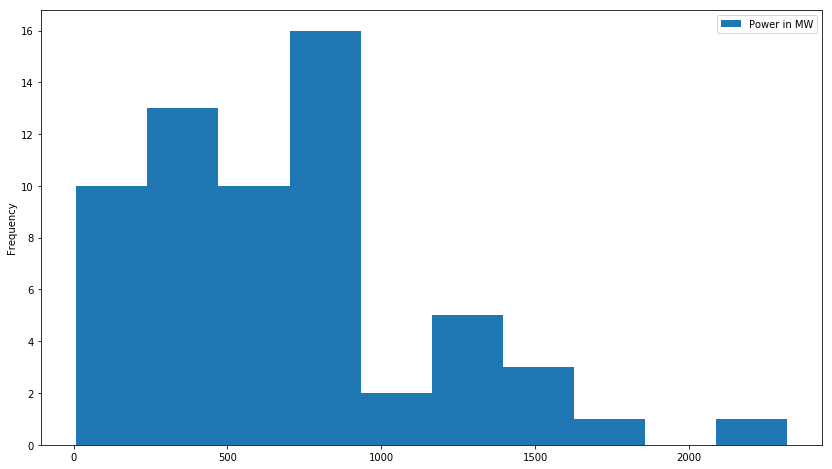

In [68]:
df[["Power in MW"]].plot.hist(figsize=(14,8));

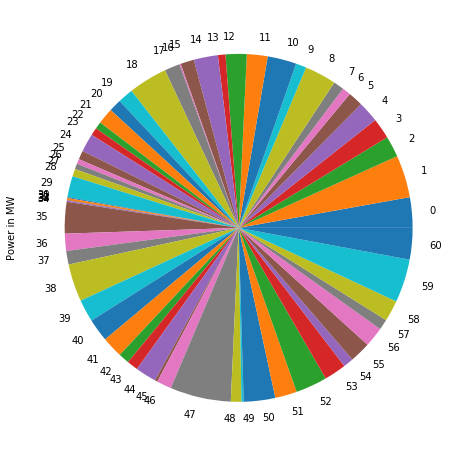

In [69]:
df["Power in MW"].plot(kind="pie",figsize=(14,8));

## group by and pivot tables

In [70]:
df[["Province","Power in MW"]].groupby("Province").sum()

,Power in MW
Province,
Almería,1159.0
Asturias,3553.0
Baleares,2235.0
Barcelona,2523.0
Castellón,1650.0
Ciudad autónoma de Ceuta,100.0
Ciudad autónoma de Melilla,84.0
Cádiz,4569.0
Córdoba,324.0


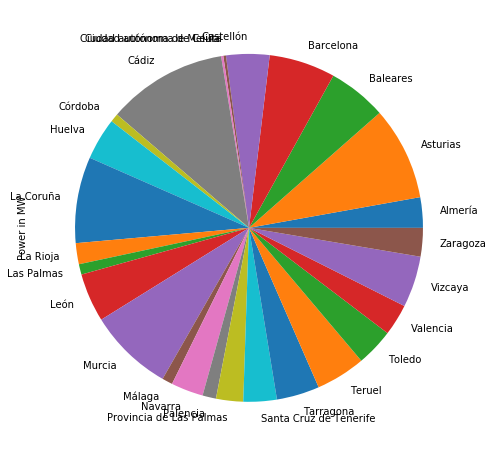

In [71]:
df[["Province","Power in MW"]].groupby("Province").sum()["Power in MW"].plot(kind="pie",figsize=(14,8))

In [72]:
df.pivot_table(index='Owners', columns='Groups',values='Power in MW',fill_value=0)

Groups,1,2,3,4,5,6,7,8,9,10,11,13
Owners,,,,,,,,,,,,
Alpiq,0.000000,800.00,0.0,0,0,0.000000,0,0,0,0,0,0
CEPSA,38.000000,0.00,0.0,0,0,0.000000,0,0,0,0,0,0
ContourGlobal,0.000000,800.00,0.0,0,0,0.000000,0,0,0,0,0,0
ESB Co. / Osaka Gas,0.000000,755.00,0.0,0,0,0.000000,0,0,0,0,0,0
EVE / BP,0.000000,795.00,0.0,0,0,0.000000,0,0,0,0,0,0
Endesa,400.000000,633.72,1101.0,1199,1294,320.333333,697,32,800,200,186,335
Endesa / Naturgy,0.000000,800.00,0.0,0,0,0.000000,0,0,0,0,0,0
Engie,0.000000,790.00,0.0,0,0,0.000000,0,0,0,0,0,0
Engie / AES,0.000000,0.00,1200.0,0,0,0.000000,0,0,0,0,0,0


In [73]:
df.to_csv("data.csv")